<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Word Cloud</font></h1>

# Downloading and Prepping Data <a id="2"></a>

Import Primary Modules:

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
from PIL import Image # converting images into arrays

`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by **Lewis Carroll** titled *Alice's Adventures in Wonderland*. Let's go ahead and download a _.txt_ file of the novel.

In [2]:
# open the file and read it into a variable publication_text
publication_text = open('publication_text.txt', 'r', errors='replace').read()
    
print ('File opened!')

File opened!


Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [20]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [4]:
# instantiate a word cloud object
publication_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
publication_wc.generate(publication_text)

Awesome! Now that the `word` cloud is created, let's visualize it.

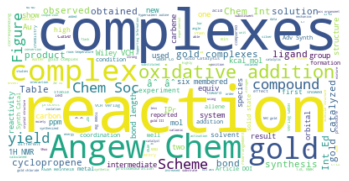

In [5]:
# display the word cloud
plt.imshow(publication_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Reaction**, **Angew**, **Chem**, **complexes**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

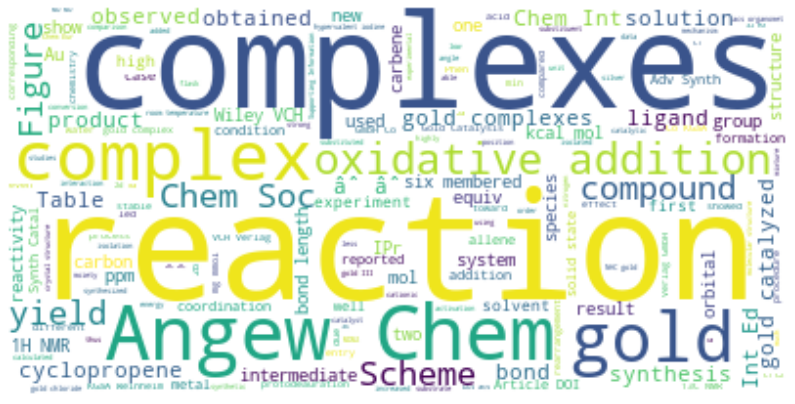

In [6]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(publication_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

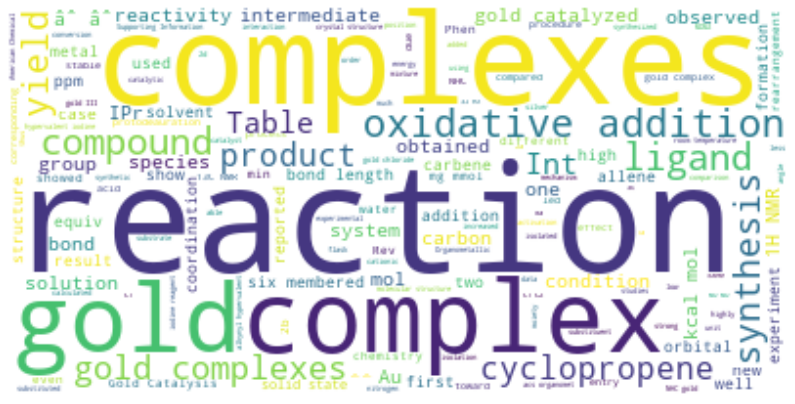

In [50]:
#stopwords = set(STOPWORDS)

# add additional stopwords
additional_stopwords = ['Angew', 'Chem', 'Figure', 'Scheme', 'Table,' 'Int', 'Ed', 'Soc', 'DOI', 'Wiley', 'VCH', "Co", 'KGaA',
                        'â^', 'Verlag', 'GmbH', 'Synth', 'Adv', 'Catal']

for additional_stopword in additional_stopwords:
    stopwords.add(additional_stopword) # add the words to stopwords

publication_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)    

# re-generate the word cloud
publication_wc.generate(publication_text)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(publication_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of an Erlenmeyer flask.

In [51]:
# save mask to alice_mask
publication_mask = np.array(Image.open('flask.png'))
    
print('Image opened and saved!')

Image opened and saved!


Let's take a look at how the mask looks like.

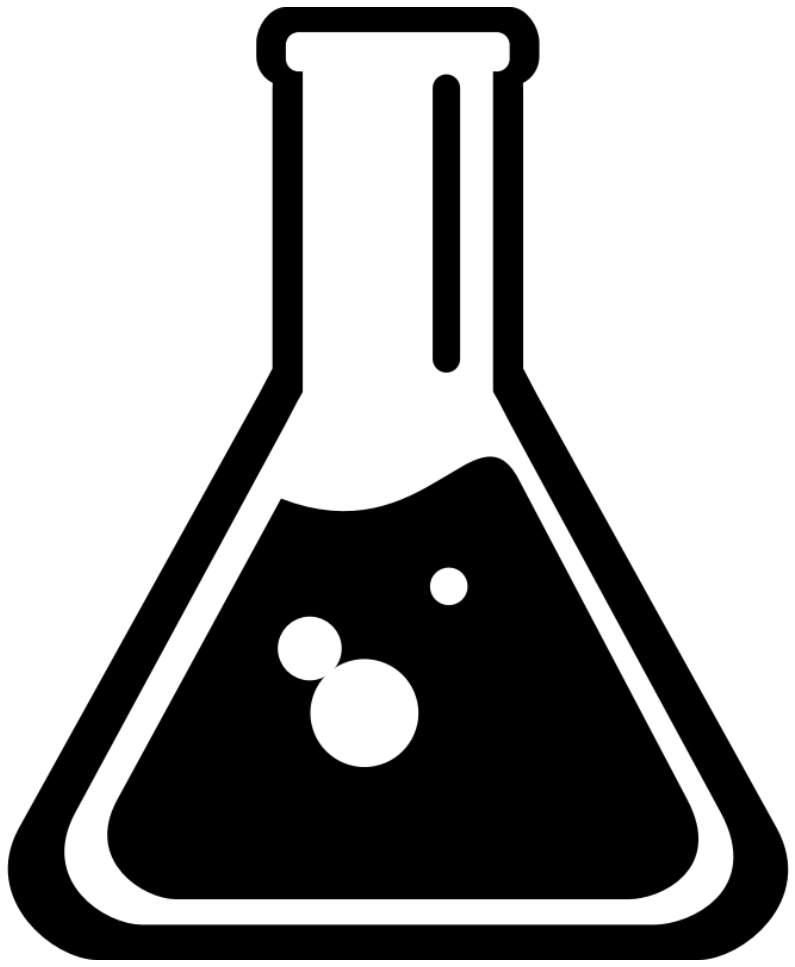

In [52]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(publication_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.

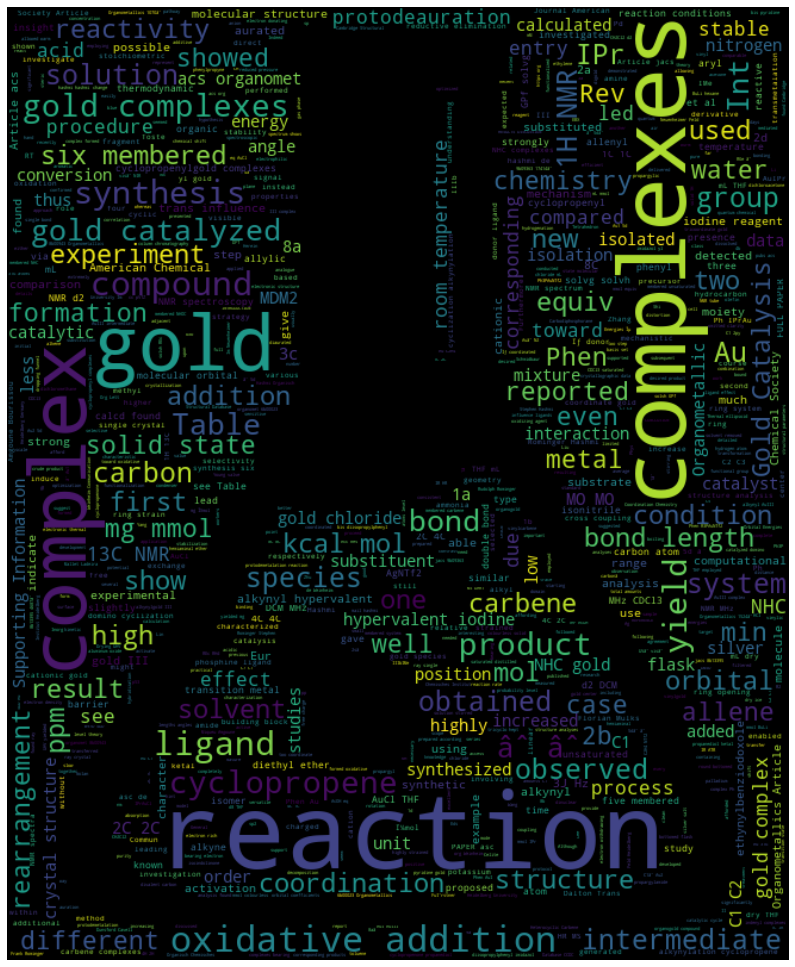

In [53]:
# instantiate a word cloud object
publication_wc = WordCloud(background_color='black', max_words=2000, mask=publication_mask, stopwords=stopwords)

# generate the word cloud
publication_wc.generate(publication_text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(publication_wc, interpolation='bilinear')
plt.axis('off')
plt.show()